In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pd.set_option('display.precision',1)

In [3]:
df = pd.read_csv('titanic_.csv')

In [4]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.3
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.1
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0


## Задание 1 (5 баллов)

<b>1. Для каждого признака подпишите, является он категориальным, порядковым или количественным.

Survived - категориальный\
Pclass - порядковый\
Name - наверное и не признак вовсе\
Sex - категориальный\
Age - количественный\
Siblings/Spouses Aboard - количественный\
Parents/Children Aboard	- количественный\
Fare - количественный

<b>2. Выведите основные статистики для каждого из признаков: среднее, мода, дисперсия, максимум, минимум (там, где это осмысленно делать). 

Осмысленно вывести статистики для количественных признаков:

In [6]:
df[['Age', 'Fare', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']].describe().loc[['mean', 'std', 'min', 'max']]

,Age,Fare,Siblings/Spouses Aboard,Parents/Children Aboard
mean,29.5,32.3,0.5,0.4
std,14.1,49.8,1.1,0.8
min,0.4,0.0,-1.0,0.0
max,80.0,512.3,8.0,6.0


А вот моду осмысленно вывести для категориальных и порядковых признаков:

In [7]:
mode_df = df[['Survived','Pclass','Sex']].mode()
mode_df.index = ['мода']

mode_df

,Survived,Pclass,Sex
мода,0,3,male


<b>Есть ли признаки, которые вы бы стали логарифмировать, почему?

Возможно, я бы прологарифмировал признак Fare. Я так понял, это стоимость билета на круиз. В контексте каких-то задач нас может интересовать не на сколько отличаются стоимости, а во сколько раз они отличаются.


<b>3. Найдите пропуски и дубликаты в данных, устраните их, напишите, почему вы решили именно так устранить пропуски

Дубликатов я не нашел:

In [8]:
df[df.duplicated()]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare


Теперь насчет пропусков: 

В предыдущем пункте в табличке было видно, что признак Siblings/Spouses Aboard принимает отрицательные значения. Рассмотрим их:

In [9]:
df.loc[df['Siblings/Spouses Aboard']<0]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
98,0,2,Mr. Sinai Kantor,male,34.0,-1,0,26.0
128,0,3,Mr. Johan Ekstrom,male,45.0,-1,0,7.0
366,1,3,Miss. Annie Jermyn,female,22.0,-1,0,7.8
432,1,1,Miss. Lucile Polk Carter,female,14.0,-1,2,120.0
562,0,3,Mr. Alfred J Davies,male,24.0,-1,0,24.1


Очевидно, они некорректные. Можно сказать, что это пропуски. Заменю эти значения на среднее этого признака в остальном датасете. Такая логика поможет свести к минимуму влияние некорректных значений на статистику датасета. Недостатком такого решения является то, что мы вносим свое влияние на данные.

In [10]:
val_mean = df[df['Siblings/Spouses Aboard']>0]['Siblings/Spouses Aboard'].mean()
df.loc[df['Siblings/Spouses Aboard']<0, 'Siblings/Spouses Aboard'] = val_mean

Теперь посмотрим на непосредственные пропуски в данных:

In [11]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       2
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Как видим, значение None принимают имена пассажиров. Что ж, заполню их рандомной строкой

In [12]:
df['Name'].fillna('kek', inplace=True)

<b>4. Для каждого признака постройте гистограммы частот его значений.

<AxesSubplot:xlabel='Survived', ylabel='count'>

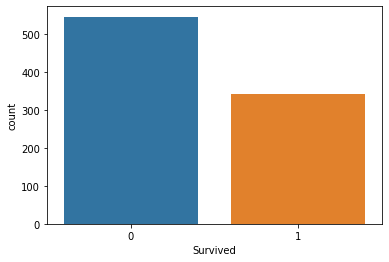

In [13]:
sns.countplot(x=df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

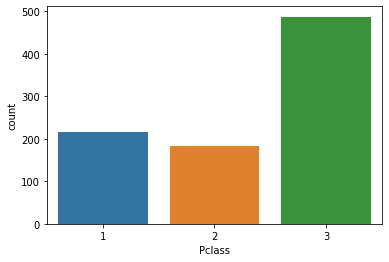

In [14]:
sns.countplot(x=df['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

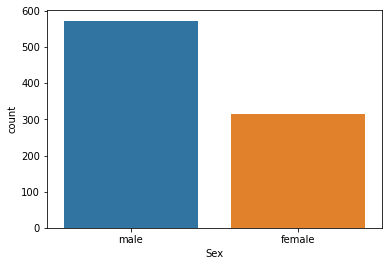

In [15]:
sns.countplot(x=df['Sex'])

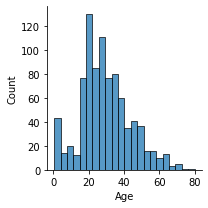

In [16]:
sns.displot(x=df['Age'], kde=False, height=3)

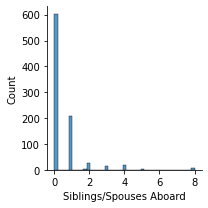

In [17]:
sns.displot(x=df['Siblings/Spouses Aboard'], kde=False, height=3)

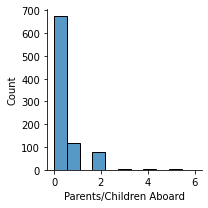

In [18]:
sns.displot(x=df['Parents/Children Aboard'], kde=False, height=3)

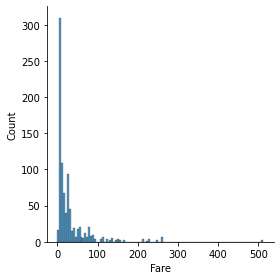

In [19]:
sns.displot(x=df['Fare'], kde=False, height=4)

<b>5. Посмотрите на зависимости пар признаков, есть ли зависимые, какие?

Построим pairplot:

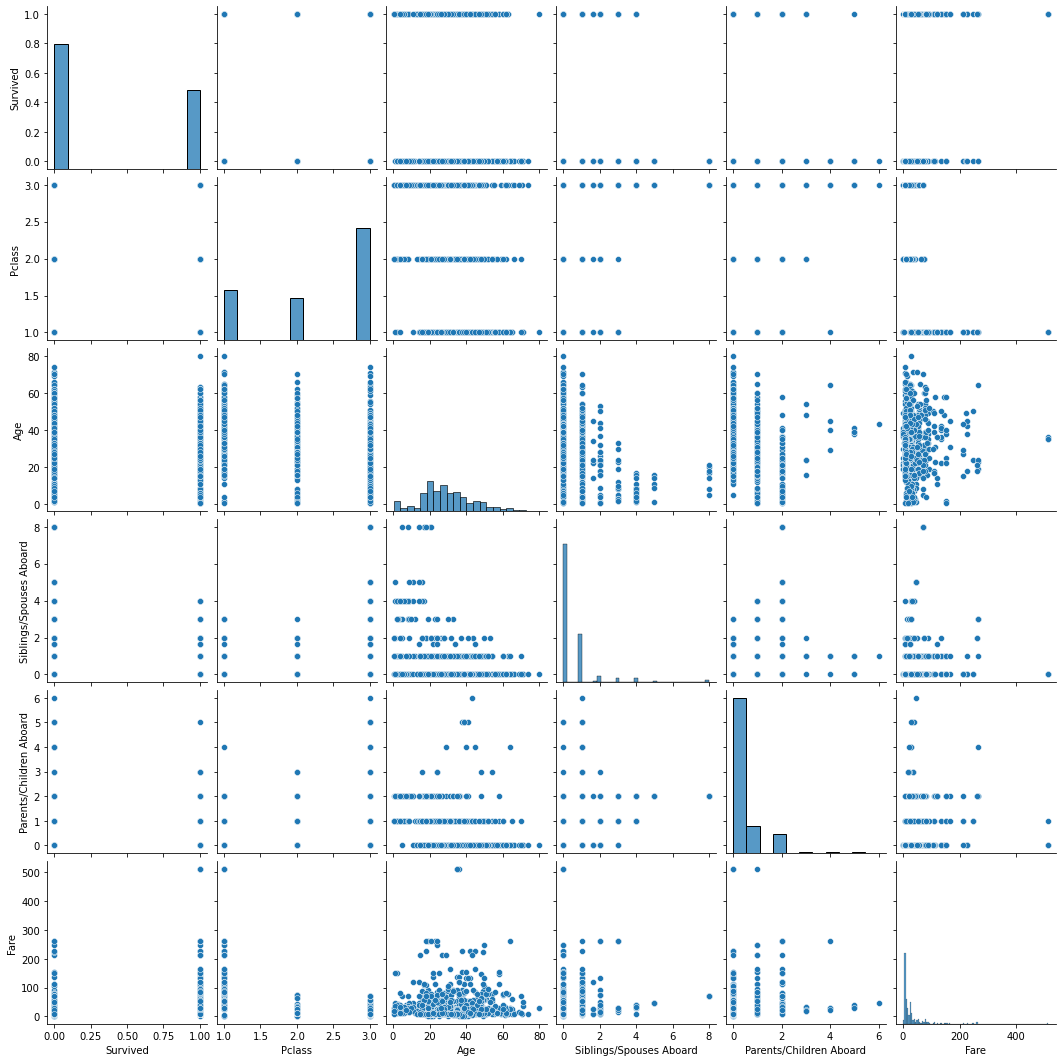

In [20]:
sns.pairplot(df)

Видна некоторая корреляция между возрастом (Age) и количеством всяких родственников на борту (Siblings/Spouses Aboard и Parents/Children Aboard). Типа чем больше возраст, тем меньше родственников на борту. Особенно заметно для Siblings/Spouses Aboard.

Есть подозрение, что признак Fare может коррелировать с другими. Давайте логарифмируем его, как я предлагал ранее. 

In [21]:
df['Fare']=np.log(df['Fare'])

c:\users\роберт\appdata\local\programs\python\python38\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


И построим еще один pairplot:

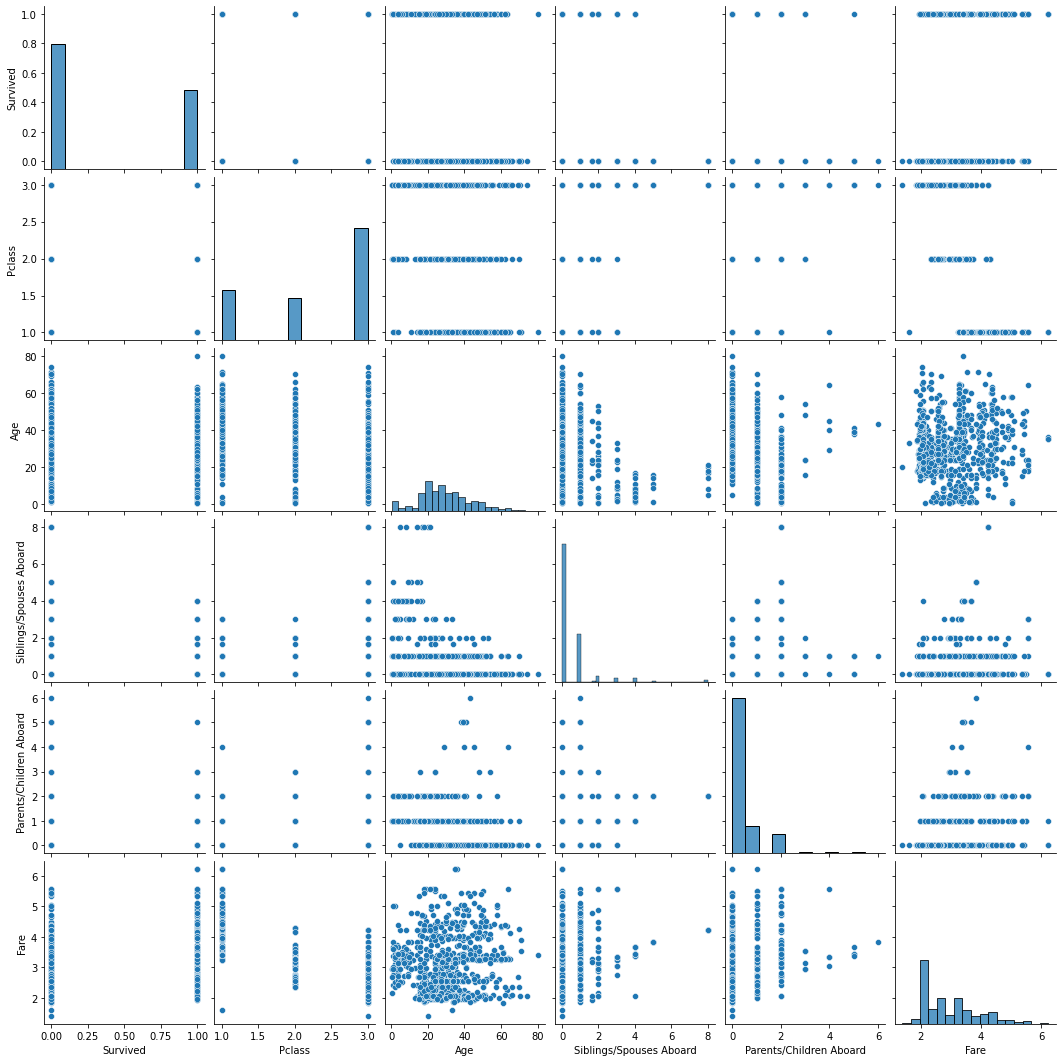

In [22]:
sns.pairplot(df)

Теперь видно, что чем больше родственников на борту, тем выше стоимость билета.

Также видно, что чем выше класс каюты (Pclass), тем выше стоимость билета.

<b>6. Какие признаки можно удалить и почему?

Можно удалить признак Name. Для анализа данных он не представляет интереса - его сложно отнести и к категориальным, и к количественным, и к порядковым признакам.

In [23]:
df.drop(columns=['Name'],inplace=True)